In [ ]:
# 2.Data Mining Fundamentals

In [ ]:
# Section 2.1 Cluster analysis

In [297]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 
%matplotlib  inline 

In [298]:
df = pd.read_csv('single_family_home_values.csv') # đưa vào trong thư mục đã tạo trong python thì mới đọc được kiểu này

In [299]:
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [301]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [302]:
X = df.drop('estimated_value', axis=1)  # drop xóa axis=1 của trường estimated_value, X:định nghĩa thêm 1 giá trị có tên X

In [303]:
 # insert các cột trong giá trị X
X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt', 'priorSaleAmount']]

In [304]:
X.fillna(0, inplace=True) # Loại Bỏ Các Ô Dữ Liệu Trống với dropna

In [305]:
X.head(2)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0


In [306]:
# fit lấy 1 giá trị phù hợp,kmeans:from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)  

In [307]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [308]:
len(kmeans.labels_), X.shape

(15000, (15000, 7))

In [309]:
labels = kmeans.labels_ # định nghĩa labels

In [310]:
kmeans.cluster_centers_.shape

(5, 7)

In [311]:
kmeans.cluster_centers_[0]

array([3.31226296e+00, 3.83944374e+00, 8.42730721e+00, 2.69720607e+03,
       6.97174968e+03, 1.94200506e+03, 7.43586930e+05])

In [312]:
X['cluster'] = labels

In [313]:
X.groupby('cluster').median()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,3.0,4.0,8.0,2582.0,6250.0,1927.0,651500.0
1,2.0,2.0,5.0,1133.0,6236.5,1928.5,0.0
2,3.0,4.5,9.0,3748.0,8597.5,1998.0,13750055.0
3,4.0,6.0,10.0,4424.0,8580.0,1989.0,2200000.0
4,3.0,2.0,6.0,1327.0,5210.0,1923.0,279900.0


In [314]:
X= X.drop('cluster', axis=1) # drop loại bỏ cột

In [315]:
from  sklearn.metrics import silhouette_score

In [316]:
for i in range(3, 10):
    kmeans=KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    print (silhouette_score(X, labels))
    #print  kmeans.cluster_centers_  

0.6145595723417597
0.6167459027690271
0.6336594067404021
0.6438471925882904
0.6591842039242759
0.660940918441709
0.6571965300913395


Automatically created module for IPython interactive environment


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: `np.float` is a deprecate

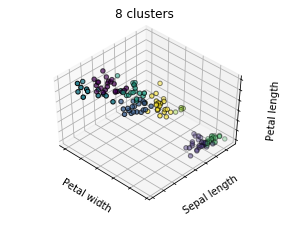

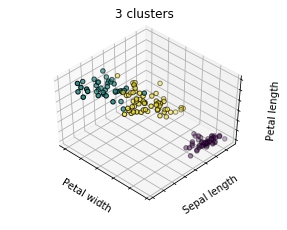

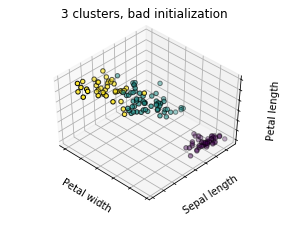

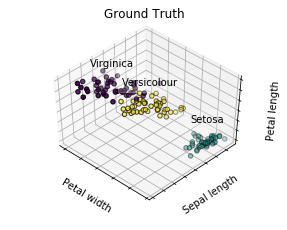

In [317]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()


In [318]:
# Section 2.2 Classification and regression

In [319]:
# LinearRegression (Hồi Quy Tuyến Tính), LogisticRegression dùng cho phân loại tuyến tính
from sklearn.linear_model import LinearRegression, LogisticRegression  

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor

from sklearn.model_selection import train_test_split # phiên bản phù hợp

#from sklearn.cross_validation import train_test_split

from sklearn.metrics import confusion_matrix

In [320]:
X.head(2)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
y=df.estimated_value

In [ ]:
lg = LinearRegression()
lg.fit(X,y)
lg.score(X,y)

In [ ]:
X_train, X_test,  y_train, y_test= train_test_split(X,y)

In [ ]:
X_train.shape, y_train.shape 

In [ ]:
lg = LinearRegression()
lg.fit(X_train,y_train) # training , fit 
lg.score(X_test,y_test) # evaluate , score, R2 

In [ ]:
df['estimated_value_bins']=df.estimated_value.apply(lambda x: 'high' if x> 500000 else 'low')

In [ ]:
df.estimated_value_bins.value_counts()

In [ ]:
df.estimated_value.hist()

In [ ]:
df.head(10)

In [ ]:
y2= df.estimated_value_bins

In [ ]:
log = LogisticRegression() 

In [ ]:
X_train, X_test,  y2_train, y2_test= train_test_split(X,y2)

In [ ]:
log.fit(X_train, y2_train)

In [ ]:
log.score(X_test, y2_test)

In [ ]:
log.predict(X_test)

In [ ]:
log.predict(X_test), y2_test

In [ ]:
y_pred = log.predict(X_test) 

In [ ]:
np.array(y2_test)

In [ ]:
confusion_matrix(y2_test,y_pred )

In [ ]:
#confusion_matrix(y2_test,y_pred )
 #   true labels
 #   high    low
#pred

In [ ]:
## Section 2.2 Continued
from IPython.display import Image

In [ ]:
Image('svm.png')
print ('Support Vector Machine')

In [ ]:
Image('svm.png')

In [ ]:
svr= SVR() 
svr.fit(X_train, y_train)
svr.score(X_test, y_test) 
# not so great 

In [ ]:
svc= SVC() 
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test) 

In [ ]:
y2_pred=svc.predict(X_test)

In [ ]:
confusion_matrix(y2_test, y2_pred)

In [ ]:
## KNN: 
xxxxxx
unknown=x
xxxxx    

     ooooooo
        unknown= o 
    ooooooo

In [ ]:
knn= KNeighborsRegressor() 

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
knn= KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y2_train)

In [ ]:
knn.score(X_test,y2_test) 

In [ ]:
y2_pred=knn.predict(X_test)

In [ ]:
confusion_matrix(y2_test, y2_pred)

In [ ]:
# Section 2.3 Association and correlation

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.cov()

In [ ]:
X

In [ ]:
y

In [326]:
y=df.estimated_value

In [327]:
X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'